## Введение

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). **Передо мной стоит задача выявить определяющие успешность игры закономерности.** Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
У меня в наличии данные до 2016 года, и **нужно планировать кампанию на 2017-й.** Нужно отработать принцип работы с данными. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взросвлых», «Для детей младшего возраста» или «Для подростков».

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



## Знакомство с данными

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')

Познакомимся с данными:

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрим на тип данных в столбцах:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим на порядок цифр в датафрейме:

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Подготовка данных

Приведём к нижнему регистру названия столбцов:

In [6]:
df.columns = map(str.lower, df.columns)

Поменяем тип данных в столбце ['year_of_release']

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Посмотрим пропуски в столбцах:

In [9]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим существенное количество пропусков в столбцах с оценками критиков, пользователей, а также в столбце с рейтингом ESRB.
Также видим несущественное количество пропусков в столбце с годом выпуска игры, и несколько пропусков в столбцах с названием и жанром игры.

Начнём обрабатывать. Пропуски в оценках критиков и пользователей занимают существенную долю в датасете - поэтому удалять их нельзя, чтобы не исказить анализ. Поскольку зацепиться за какой-то другой параметр затруднительно, предлагаю заполнить пропуски заглушками:

In [10]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

Также привлек внимание тип столбца ['user_score'] - object. Посмотрим, какие значения есть в этом столбце:

In [11]:
df['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В перечне значений фигурирует аббревиатура 'tbd', что означает "To Be Determined". Предлагаю также заменить это значение на заглушку.

In [12]:
df.loc[df['user_score']=='tbd','user_score'] = -1

Поменяем тип данных в столбце ['user_score']

In [13]:
df['user_score'] = df['user_score'].astype('float64')

Теперь разберёмся с рейтингом ESRB. Допускаю, что рейтинг присваивается игре в целом, независимо от платформы, поэтому предлагаю попробовать заполнить пропуски в этом столбце рейтингом по совпадающим по названию играм. Вначале сделаем вспомогательный df с названием игры и рейтингом ESRB:

In [14]:
df_support = df[df['rating'].notna()].groupby('name')['rating'].first()

Теперь заполним пропуски ESRB по совпадающим играм:

In [15]:
df['rating'] = df['rating'].fillna(df['name'].map(df_support))

Оставшиеся пропуски заполним заглушкой:

In [16]:
df['rating'] = df['rating'].fillna('unknown')

Посмотрим какую долю занимают строчки с пропусками в ['year_of_release']:

In [17]:
len(df[df['year_of_release'].isna()]) / len(df) * 100

1.609332934489979

Всего 1.6% датасета - некрититично, можно удалить. Также можно удалить четыре строчки с пропусками в названиях и жанрах.

In [18]:
df = df.dropna(subset=['name','genre','year_of_release'])

Проверим, что все пропуски заполнились:

In [19]:
df.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Запишем в отдельный столбец суммарные продажи во всех регионах:

In [20]:
df['total_games'] = df['na_sales']\
    + df['eu_sales']\
    + df['jp_sales']\
    + df['other_sales']

In [21]:
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_games
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


## Исследовательский анализ данных

Посмотрим на общую динамику продаж по годам:

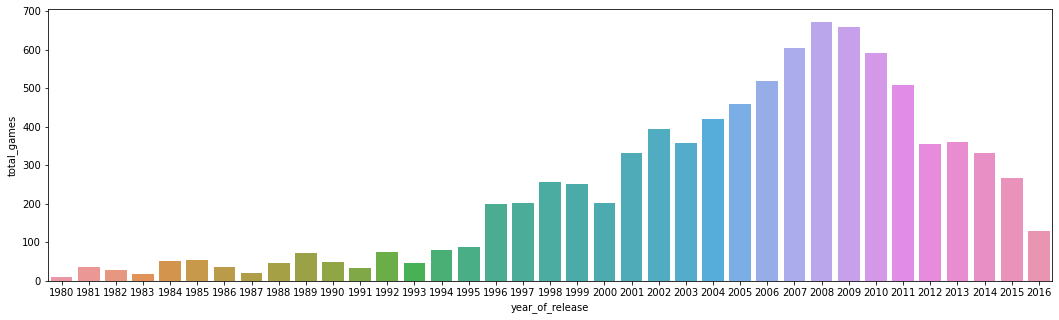

In [22]:
pivot_year = df.pivot_table(index='year_of_release',\
                                values='total_games',\
                                aggfunc='sum').reset_index()
plt.figure(figsize = (18,5))
sns.barplot(x='year_of_release',y='total_games',data=pivot_year)
plt.show()

**Краткий вывод**

График показывает, что бурный рост в выпуске компьютерных игр начался с 1996 года, и активно продолжался до 2008-2009 годов. С 2010 года начался спад, в 2012-2013 года были относительно стабильные, с 2014 года снижение продолжилось.

За актуальный период возьмём данные **с 2012 года**, т.к. на графике видно, что вернуться к объёмам реализации 2008-2009 годов уже не получится по причине поступления на рынок мобильных игр.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Для начала определим топ платформ по продажам:

In [23]:
# делаю пивот по платформам и суммарным продажам, сортирую по убыванию, создаю список из топ 6
top_platforms = (
    df.pivot_table
    (index='platform',
     values='total_games',
     aggfunc='sum')
    .sort_values(by='total_games', ascending=False)
    .head(6)
    .reset_index()
)
top_platforms = top_platforms['platform'].tolist()

Теперь сделаем пивот по топ платформам для графика:

In [24]:
pivot_platform = df[df['platform'].isin(top_platforms)].pivot_table(index=['platform','year_of_release'],\
                                                            values='total_games',\
                                                           aggfunc='sum').reset_index()
pivot_platform

,platform,year_of_release,total_games
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


Построим распределение продаж на топ платформах по годам:

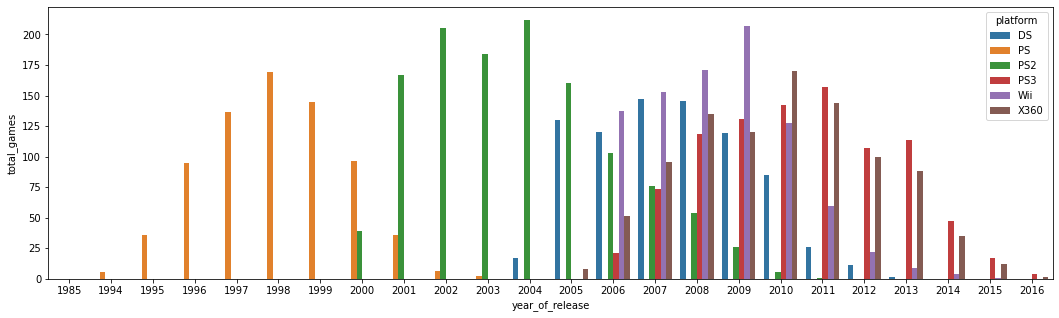

In [25]:
plt.figure(figsize = (18,5))
sns.barplot(x='year_of_release',y='total_games',hue='platform',data=pivot_platform)
plt.show()

**Краткий вывод**

График показывает, что характерный срок, за который появляются новые и исчезают старые платформы примерно 7-10 лет. Также на графике наглядно видно, как более новые версии PS заменяют старые: продажи игр на PS стартуют в 1994, затем в 2000-2001 годах PS2 заменяет PS, затем в 2008 году PS3 обновляет PS2. При этом с 2006-2010 годов растут продажи на X360 и Wii. Также с 2005 по 2008 годов существенную долю в продажах занимали игры на платформе DS. С 2010 рынок поделили 2 явных лидера - PS3 и X360, этот год также был пиком продаж для данных двух платформ, однако с 2011 виден постепенный спад продаж. В 2014 году продали в 2 раза меньше, чем год назад - дела у играх на консолях совсем стали плохи, а в 2015 и 2016 годах объемы продаж упали до 1994 года.

На основе предыдущих выводов сформируем отдельный **good_df** с реализациями игр начиная с 2012 года:

In [26]:
good_df = df[df['year_of_release']>= 2012]

Теперь посмотрим еще раз на лидеров рынка конкретно за исследуемый период:

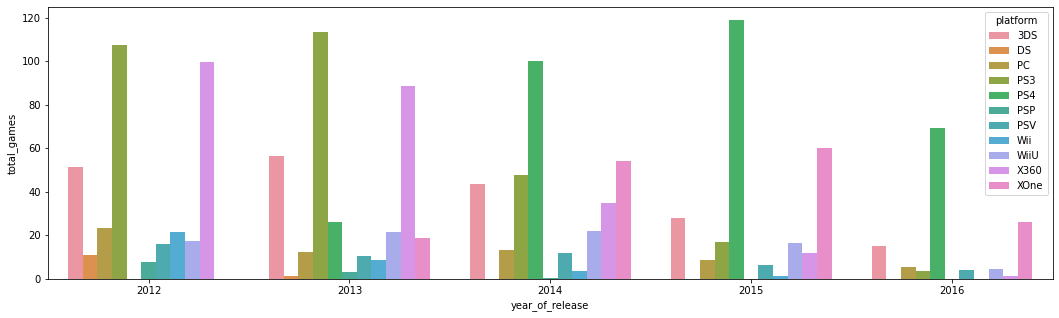

In [27]:
pivot_platform = good_df.pivot_table(index=['platform','year_of_release'],\
                                                            values='total_games',\
                                                           aggfunc='sum').reset_index()
plt.figure(figsize = (18,5))
sns.barplot(x='year_of_release',y='total_games',hue='platform',data=pivot_platform)
plt.show()

В 2012 - 2013 годах явными лидерами рынка были PS3 и X360. Еще можно отметить платформу 3DS - с 2012 по 2014 у данной консоли тоже была определенная доля на рынке. С 2014 по 2016 года самой популярной приставкой являлась PS4, а также XOne - у данной приставки тоже были свои фанаты. У остальных платформ доля на рынке гораздо меньше.

**Краткий вывод**

Самые популярные платформы за исследуемый период: 'PS3', 'X360', '3DS', 'PS4', 'XOne'.

In [28]:
most_popular_platform = ['PS3', 'X360', '3DS', 'PS4', 'XOne']

Построим график «ящик с усами» по глобальным продажам игр в разбивке по топ платформам:

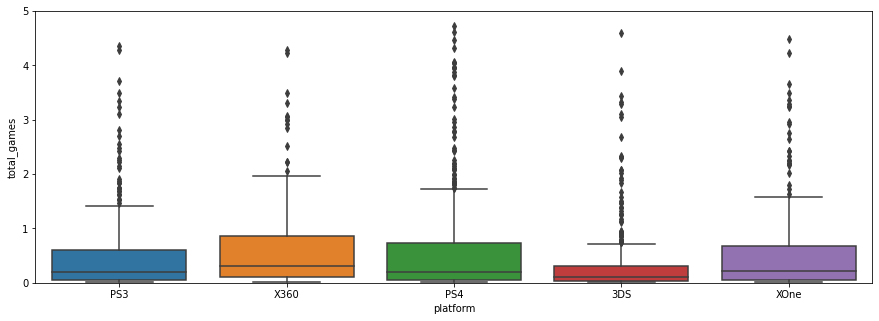

In [29]:
plt.figure(figsize = (15,5))
sns.boxplot(data=good_df.query('platform == @most_popular_platform'), x='platform', y='total_games')
plt.ylim(0,5)
plt.show()

На графике хорошо видно, что для всех платформ типовой размер реализации игр (тут имею ввиду межквартильный размах 3Q) лежит примерно до 2 млн. С 2 до 4 млн. - жирные хвосты, игры, которые "выстрелили" и были супер-популярными. Дальше уже начинаются выбросы - особо редкие наблюдения, их по несколько штук на каждой платформе. Построим гистограмму, чтоб посмотреть немного под иным углом:

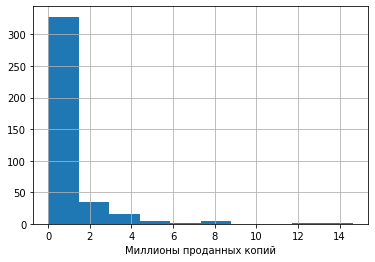

In [30]:
good_df.query('platform == "PS4"')['total_games'].hist()
plt.xlabel('Миллионы проданных копий')
plt.show()

Гистограмма подтверждает, что основное распределение реализации игр лежит до 2 млн. Но также есть определённый набор игр до 4 млн. - дальше уже идут редкие, выбивающиеся значения.

Теперь посмотрим, как влияют на продажи игр на PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами. Возьмём только игры с мировыми продажами до 4 млн.

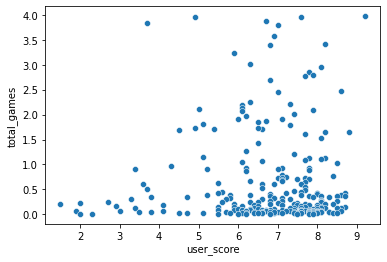

In [31]:
sns.scatterplot(data=good_df.query('platform=="PS4" and user_score > 0 and total_games < 4'),
                x="user_score",
                y="total_games")
plt.show()

Диаграмма рассеяния показывает, связи между оценкой пользователя и мировыми продажами практически нет. Несмотря на то, что в левой верхней части прямоугольника нет наблюдений (т.е. нет игр с низкими оценками, но высокими продажами), в правой части есть наблюдения и снизу, и сверху - т.е. есть игры с высокими оценками снизкими продажами, так и с высокими продажами. Посчитаем коэффициент корреляции:

In [32]:
good_df.query('platform=="PS4" and user_score > 0 and total_games < 4')['total_games']\
.corr(good_df.query('platform=="PS4" and user_score > 0 and total_games < 4')['user_score'])

0.018066258359616935

Коэффициент подтверждает, что связи никакой нет. Теперь проверим связь между оценкой критиков и продажами.

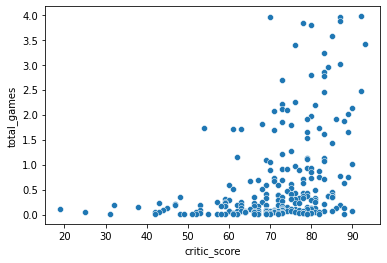

In [33]:
sns.scatterplot(data=good_df.query('platform=="PS4" and critic_score > 0 and total_games < 4'),
                x="critic_score",
                y="total_games")

plt.show()

Ситуация схожа с оценками пользователей - есть игры с высокими оценками критиков с низкими продажами и высокими продажами. Посчитаем коэффициент корреляции:

In [34]:
good_df.query('platform=="PS4" and critic_score > 0 and total_games < 4')['total_games']\
.corr(good_df.query('platform=="PS4" and critic_score > 0 and total_games < 4')['critic_score'])

0.38870967969534787

Корреляция чуть выше, чем с оценками пользователей, но всё равно связь несущественная.

Построим такие же графики для других платформ, и посчитаем для них коэффициенты корреляции:

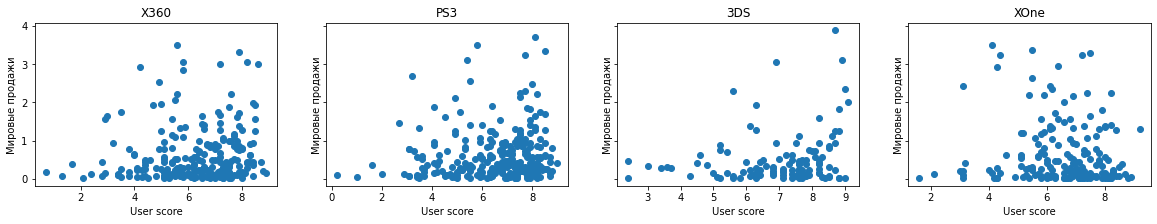

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20,3))

ax[0].scatter(data=good_df.query('platform=="X360" and user_score > 0 and total_games < 4'), x='user_score',y='total_games')
ax[1].scatter(data=good_df.query('platform=="PS3" and user_score > 0 and total_games < 4'), x='user_score',y='total_games')
ax[2].scatter(data=good_df.query('platform=="3DS" and user_score > 0 and total_games < 4'), x='user_score',y='total_games')
ax[3].scatter(data=good_df.query('platform=="XOne" and user_score > 0 and total_games < 4'), x='user_score',y='total_games')
for item in range(0,4):
    ax[item].set_ylabel('Мировые продажи')
    ax[item].set_xlabel('User score')
    
ax[0].set_title('X360')
ax[1].set_title('PS3')
ax[2].set_title('3DS')
ax[3].set_title('XOne')
plt.show()

In [36]:
print('Корреляция между оценками пользователей и мировыми продажами:\n')
for item in most_popular_platform:
    print(
        'Коэффициент кореляции на', item, 'равен',\
        good_df.query('platform==@item and user_score > 0 and total_games < 4')['total_games']\
        .corr(good_df.query('platform==@item and user_score > 0 and total_games < 4')['user_score'])
    )

Корреляция между оценками пользователей и мировыми продажами:

Коэффициент кореляции на PS3 равен 0.07933051364487355
Коэффициент кореляции на X360 равен 0.12388193743999627
Коэффициент кореляции на 3DS равен 0.22564973886704512
Коэффициент кореляции на PS4 равен 0.018066258359616935
Коэффициент кореляции на XOne равен -0.08698831966398428


Как видно на графиках, оценка пользователей несущественно влияет на продажи и на других платформах. В одном можно быть точно уверенным - не бывает игр с низкими оценками, но высокими продажами. Коэффициенты корреляции также низкие, что подтверждает слабую связь.

Сделаем такой же анализ с оценками критиков:

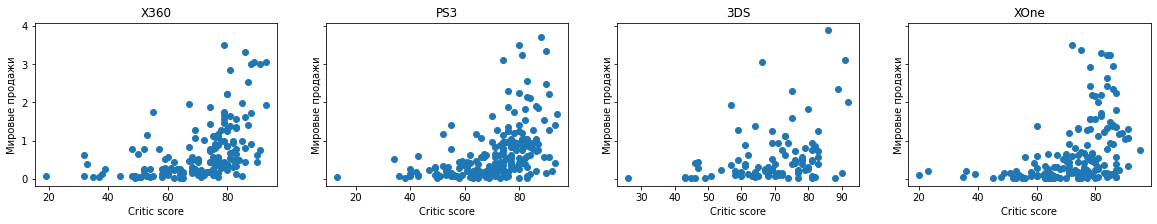

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20,3))

ax[0].scatter(data=good_df.query('platform=="X360" and critic_score > 0 and total_games < 4'), x='critic_score',y='total_games')
ax[1].scatter(data=good_df.query('platform=="PS3" and critic_score > 0 and total_games < 4'), x='critic_score',y='total_games')
ax[2].scatter(data=good_df.query('platform=="3DS" and critic_score > 0 and total_games < 4'), x='critic_score',y='total_games')
ax[3].scatter(data=good_df.query('platform=="XOne" and critic_score > 0 and total_games < 4'), x='critic_score',y='total_games')
for item in range(0,4):
    ax[item].set_ylabel('Мировые продажи')
    ax[item].set_xlabel('Critic score')
    
ax[0].set_title('X360')
ax[1].set_title('PS3')
ax[2].set_title('3DS')
ax[3].set_title('XOne')
plt.show()

In [38]:
print('Корреляция между оценками критиков и мировыми продажами:\n')
for item in most_popular_platform:
    print(
        'Коэффициент кореляции на ', item, 'равен',\
        good_df.query('platform==@item and critic_score > 0 and total_games < 4')['total_games']\
        .corr(good_df.query('platform==@item and critic_score > 0 and total_games < 4')['critic_score'])
    )

Корреляция между оценками критиков и мировыми продажами:

Коэффициент кореляции на  PS3 равен 0.4552955677850093
Коэффициент кореляции на  X360 равен 0.4950969220466902
Коэффициент кореляции на  3DS равен 0.33902437993862006
Коэффициент кореляции на  PS4 равен 0.38870967969534787
Коэффициент кореляции на  XOne равен 0.40247317540796707


Как и с оценками пользователей, смотря на графики выше нельзя быть уверенным, что мировые продажи зависят от оценок критиков. Есть игры с высокими продажами, так и с небольшими продажами, но с высокой оценкой. При этом нет игр с низкими оценками, но высокими продажами. Коэффициенты корреляции выше, чем в оценках пользователей, но тем не менее всё еще недостаточные, чтобы говорить о сильной связи.

Посмотрим на общее распределение игр по жанрам. Cформируем пивот и построим по ней график.

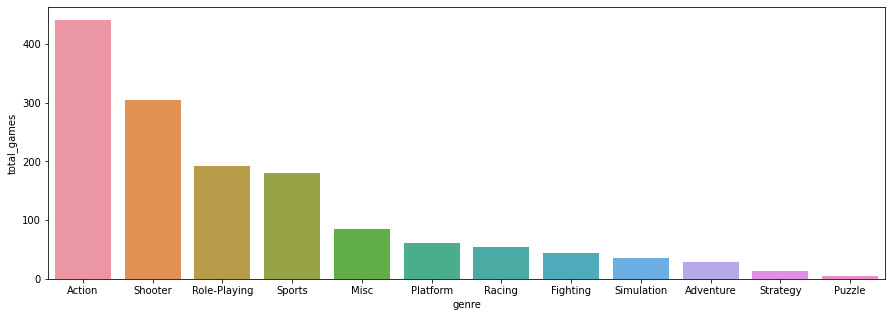

In [39]:
pivot_jenre = good_df.pivot_table(index='genre',
                                  values='total_games',
                                  aggfunc='sum').reset_index().sort_values(by='total_games', ascending=False)
plt.figure(figsize = (15,5))
sns.barplot(data=pivot_jenre,x='genre',y='total_games')
plt.show()

Самый прибыльный жанр - Action. На втором месте Shooter. 3 место делят между собой Role-Playing и Sports. Остальные жанры существенно отстают по прибыльности.

## Портрет пользователя каждого региона

Посмотрим, как распределяются продажи в разрезе самых популярных (топ-5) платформ в каждом регионе. В качестве agg используем медиану, как менее зависимую от выбросов величину.

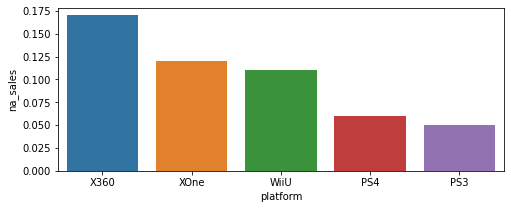

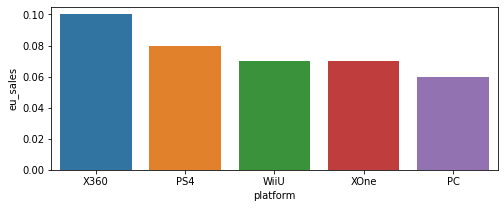

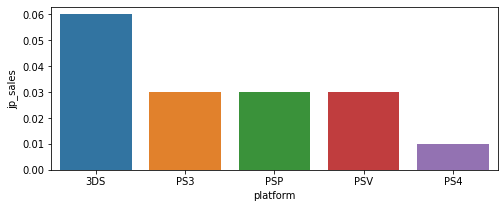

In [40]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for i in columns:
    pivot_platform = good_df.pivot_table(index='platform',
                                         values=i,
                                        aggfunc='median').reset_index().sort_values(by=i,ascending=False).head(5)
    plt.figure(figsize = (8,3))
    sns.barplot(x='platform',y=i,data=pivot_platform)
    plt.show()

В Северной Америке и Европе самая популярная платформа - X360. Второе место в Европе занимает PS4, в то время как в Америке на втором месте XOne. На 3 месте в Америке и Европе WiiU. В Японии самая популярная платформа - 3DS. Второе место поделили между собой PS3, PSP и PSV. X360 и XOne не пользуются популярностью в Японии вовсе.


Посмотрим, как распределяются продажи в разрезе самых популярных (топ-5) жанров в каждом регионе. В качестве agg используем медиану, как менее зависимую от выбросов величину.

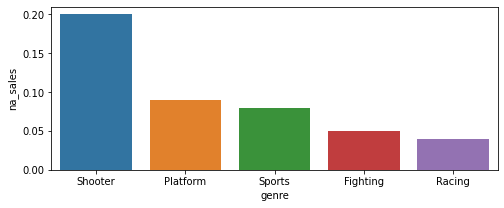

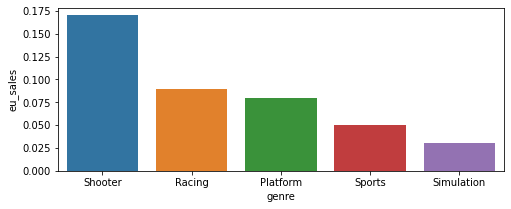

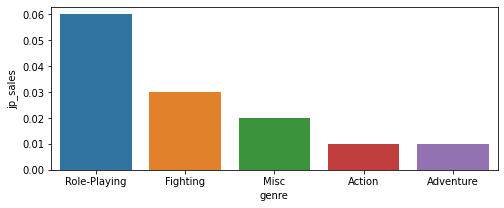

In [41]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
for i in columns:
    pivot_genre = good_df.pivot_table(index='genre',
                                         values=i,
                                        aggfunc='median').reset_index().sort_values(by=i,ascending=False).head(5)
    plt.figure(figsize = (8,3))
    sns.barplot(x='genre',y=i,data=pivot_genre)
    plt.show()

В Северной Америке и Европе самый популярный жанр - Shooter. На втором месте в Америке жанр Platform, в Европе он на 3 месте по популярности, немного отставая от Racing. А вот в Америке Racing на 5 месте. Также в Америке пользуется популярностью жанр Fighting, в то время как в Европе этого жанра нет в топ-5 по жанрам. В Японии Shooting отсутствует в топ-5 жанрах. Допускаю, что это связано с ограничениями на жестокие сцены в играх. Самым популярным жанром является Role_Playing, на 2 месте Fighting.

Теперь посмотрим, влияет рейтинг ESRB на продажи в каждом регионе. Сформируем сводную таблицу в разрезе рейтингов и регионов по медианам продаж. Подсветим самые существенные позиции.

In [42]:
good_df.pivot_table(index='rating',values=columns,aggfunc='median')\
.sort_values(by='eu_sales',ascending=False)\
.style.background_gradient()

,eu_sales,jp_sales,na_sales
rating,,,
M,0.130000,0.000000,0.140000
E10+,0.110000,0.000000,0.130000
E,0.060000,0.000000,0.070000
T,0.040000,0.020000,0.050000
unknown,0.000000,0.030000,0.000000


По таблице выше можно сделать вывод, что в Европе и Северной Америке самые продаваемые игры с рейтингом "Mature" и "Everyone 10 and older". В Японии больше всего продаётся игр с рейтингом "Teen" - продукты для лиц от 13 лет.

## Проверка гипотез

Проверим следующие гипотезы:

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.ttest_ind.
Также, т.к. скорей всего выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False в данном методе, чтобы тест посчитал дисперсии выборок по отдельности.

In [44]:
df_xbox = good_df.query('platform=="XOne" and user_score>0')['user_score']
df_pc = good_df.query('platform=="PC" and user_score>0')['user_score']

alpha = .01 # зададим критический уровень статистической значимости

results = st.ttest_ind(df_xbox, df_pc, equal_var=False) # проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выведем на экран получившееся p-значение

if results.pvalue < alpha: # сравним получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Значение p-value 0.55 - это означает, что вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, составляет 55%. Чем ближе выборочное среднее от значения, предполагаемого в нулевой гипотезе, тем p-value больше. Мы получили значение, гораздо больше критического уровня статистической значимости, а значит отвергнуть нулевую гипотезу не получилось.

Проверим следующие гипотезы:

Нулевая гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

Воспользуемся специальным методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.ttest_ind.
Также, т.к. скорей всего выборки разного размера и можно предположить, что дисперсии у генеральных совокупностей разные — укажем equal_var = False в данном методе, чтобы тест посчитал дисперсии выборок по отдельности.

In [45]:
df_action = good_df.query('genre=="Action" and user_score>0')['user_score']
df_sports = good_df.query('genre=="Sports" and user_score>0')['user_score']

alpha = .01 # зададим критический уровень статистической значимости

results = st.ttest_ind(df_action, df_sports, equal_var=False) # проверим гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results.pvalue) # выведем на экран получившееся p-значение

if results.pvalue < alpha: # сравним получившееся p-значение с заданным уровнем статистической значимости :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Чем дальше выборочное среднее от значения, предполагаемого в нулевой гипотезе, тем p-value меньше. Мы получили значение, гораздо меньше критического уровня статистической значимости, а значит отвергнули нулевую гипотезу.

## Общий вывод

### Какая работа была проделана:

Мы провели подготовку данных: замените названия столбцов - привели к нижнему регистру, преобразовали данные в нужные типы, обработали пропуски, посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

Затем мы провели исследовательский анализ данных: посмотрели, сколько игр выпускалось в разные годы, как менялись продажи по платформам. Затем выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. Затем определили актуальный период для построения прогноза на 2017 год. Выбрали несколько потенциально прибыльных платформ. После этого мы построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Посмотрели, как влияют на продажи внутри PS4 отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами. Провели аналогичный анализ по продажам игр на других платформах. Также мы посмотрели на общее распределение игр по жанрам.

Дальше мы составили портрет пользователя каждого региона. Мы определили для пользователя каждого региона (NA, EU, JP):

1. Самые популярные платформы (топ-5).
2. Самые популярные жанры (топ-5).
3. Влияение рейтинга ESRB на продажи в отдельном регионе.

Затем мы проверьте следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») однаковы.


### Поставленные задачи:

Перед нами стояла задачи выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Общий вывод:

Бурный рост в выпуске компьютерных игр начался с 1996 года, и активно продолжался до 2008-2009 годов. С 2010 года начался спад, в 2012-2013 года были относительно стабильные, с 2014 года снижение продолжилось.

За актуальный период взяли данные **с 2012 года**, т.к. вернуться к объёмам реализации 2008-2009 годов уже не получится по причине поступления на рынок мобильных игр.

Характерный срок, за который появляются новые и исчезают старые платформы примерно 7-10 лет. Более новые версии PS заменяют старые: продажи игр на PS стартуют в 1994, затем в 2000-2001 годах PS2 заменяет PS, затем в 2008 году PS3 обновляет PS2. При этом с 2006-2010 годов растут продажи на X360 и Wii. Также с 2005 по 2008 годов существенную долю в продажах занимали игры на платформе DS. С 2010 рынок поделили 2 явных лидера - PS3 и X360, этот год также был пиком продаж для данных двух платформ, однако с 2011 был постепенный спад продаж. В 2014 году продали в 2 раза меньше, чем год назад - дела у играх на консолях совсем стали плохи, а в 2015 и 2016 годах объемы продаж упали до 1994 года.
В 2012 - 2013 годах явными лидерами рынка были PS3 и X360. Еще можно отметить платформу 3DS - с 2012 по 2014 у данной консоли тоже была определенная доля на рынке. С 2014 по 2016 года самой популярной приставкой являлась PS4, а также XOne - у данной приставки тоже были свои фанаты. У остальных платформ доля на рынке гораздо меньше. Самые популярные платформы за исследуемый период: 'PS3', 'X360', '3DS', 'PS4', 'XOne'.

Основное распределение реализации игр лежит до 2 млн. Но также есть определённый набор игр до 4 млн. - дальше уже идут редкие, выбивающиеся значения.

Оценка пользователей несущественно влияет на продажи и на других платформах. В одном можно быть точно уверенным - не бывает игр с низкими оценками, но высокими продажами. Коэффициенты корреляции также низкие, что подтверждает слабую связь. Как и с оценками пользователей, мировые продажи слабо зависят от оценок критиков. Есть игры с высокими продажами, так и с небольшими продажами, но с высокой оценкой. При этом нет игр с низкими оценками, но высокими продажами. Коэффициенты корреляции выше, чем в оценках пользователей, но тем не менее всё еще недостаточные, чтобы говорить о сильной связи.

Самый прибыльный жанр - Action. На втором месте Shooter. 3 место делят между собой Role-Playing и Sports. Остальные жанры существенно отстают по прибыльности.

В Северной Америке и Европе самая популярная платформа - X360. Второе место в Европе занимает PS4, в то время как в Америке на втором месте XOne. На 3 месте в Америке и Европе WiiU. В Японии самая популярная платформа - 3DS. Второе место поделили между собой PS3, PSP и PSV. X360 и XOne не пользуются популярностью в Японии вовсе.

В Северной Америке и Европе самый популярный жанр - Shooter. На втором месте в Америке жанр Platform, в Европе он на 3 месте по популярности, немного отставая от Racing. А вот в Америке Racing на 5 месте. Также в Америке пользуется популярностью жанр Fighting, в то время как в Европе этого жанра нет в топ-5 по жанрам. В Японии Shooting отсутствует в топ-5 жанрах. Допускаю, что это связано с ограничениями на жестокие сцены в играх. Самым популярным жанром является Role_Playing, на 2 месте Fighting.

В Европе и Северной Америке самые продаваемые игры с рейтингом "Mature" и "Everyone 10 and older". В Японии больше всего продаётся игр с рейтингом "Teen" - продукты для лиц от 13 лет.

Подтвердили гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Отвергли гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.